# Processing temperature and precipitation data

The temperature and precipitation data in the Eastern Mediterranean region can be downloaded from the Eastern Mediterranean Climate website.<br/>
<a href="http://emcc.mgm.gov.tr/archive.aspx"><img alt="CSC badge" src="http://emcc.mgm.gov.tr/App_Themes/title_nnn1.gif" style="vertical-align:text-bottom"></a>

We will be generating simple temperature and precipitation plots for all stations in the Eastern Mediterranean region.

We are now working in a new notebook file and we need to import ```pandas``` for plotting and ```os``` for reading data files. 

In [1]:
import pandas as pd
import os

Let's work with the data from the website and load it using the `pd.read_excel()` method. We need to import os to read the contents of the `MGM` directory and read all excel files. 

In [169]:
filename = "MGM/"+os.listdir('MGM/')[0]
data = pd.read_excel(filename, usecols=['Longitute','Latitute','StationName', 'Year', 'Month', 'Temperature', 'Precipitation'])

for i in range(len(os.listdir('MGM/'))-1):
    filename = "MGM/"+os.listdir('MGM/')[i+1]
    data_add = pd.read_excel(filename, usecols=['Longitute','Latitute','StationName', 'Year', 'Month', 'Temperature', 'Precipitation'])
    frames = [data, data_add]
    data = pd.concat(frames)

We want to examine the dimensions of the data frame by `data.shape` and the head and tail of data using `data.head()` and `data.tail()`.

In [170]:
data.shape

(12004, 7)

In [171]:
data.head()

,Longitute,Latitute,StationName,Temperature,Precipitation,Year,Month
0,35.50,32.97,HAR-KNAAN,6.8,32.0,2015.0,1.0
1,34.82,32.00,RISHON LEZION,11.9,204.0,2015.0,1.0
2,36.25,32.37,MAFRAQ,7.7,52.0,2015.0,1.0
3,34.80,31.25,BEER SHEVA CITY,11.2,87.0,2015.0,1.0
4,35.47,31.03,JORDAN,15.5,37.0,2015.0,1.0


In [172]:
data.tail()

,Longitute,Latitute,StationName,Temperature,Precipitation,Year,Month
95,36.25,32.37,MAFRAQ,23.7,2.0,2023.0,6.0
96,24.12,35.48,SOUDA (AIRPORT),23.6,36.0,2023.0,6.0
97,35.58,23.12,SHALATIN,32.5,0.0,2023.0,6.0
98,22.97,40.52,THESSALONIKI (AIRPORT),24.7,90.0,2023.0,6.0
99,27.22,31.32,MERSA,23.6,0.0,2023.0,6.0


We first reset the index so the row index numbers reflect the shape of the dataframe. Than we should check the data types of `Year` and `Month` columns as we see float variables.

In [173]:
# Reset index
data.reset_index(drop=True)

# Check the numbe of rows and columns of dataframe
data.shape

(12004, 7)

In [174]:
# Check the type of dataframe
type(data)


pandas.core.frame.DataFrame

As this doesn't give information about the types of dataframe columns, we check the column types using `data.dtypes`.

In [175]:
data.dtypes

Longitute        float64
Latitute         float64
StationName       object
Temperature      float64
Precipitation    float64
Year             float64
Month            float64
dtype: object

We should change the data types of Year and Month with integer values. Before doing this, we should also make sure to remove the not available data.

In [176]:
# Fill in the not available data with 0
data["Year"] = data["Year"].fillna(0)
data["Month"] = data["Month"].fillna(0)
data["StationName"] = data["StationName"].fillna(0)

# Change the type of "Year" and "Month" columns from float to integer in the dataframe
data["Year"] = data["Year"].astype(int)
data["Month"] = data["Month"].astype(int)
data["StationName"] = data["StationName"].astype(str)

### Station list

We will be plotting the temperature and precipitation data for all stations. We have to generate the list of all stations and remove the duplications. We import numpy using `import numpy as np` and list the unique station names using `np.unique`.

```
# Import numpy
import numpy as np

# List the station names
data_stations_list = np.unique(data["StationName"].tolist())

# Print the station names
for station in np.unique(data_stations_list):
    print(station)
``` 

In [177]:
import numpy as np

data_stations_list = np.unique(data["StationName"].tolist())

print(data_stations_list)


['0' 'ADANA' 'ADIYAMAN' 'AFYONKARAHİSAR' 'AKCAKOCA' 'AKHİSAR' 'AKSARAY'
 'AKŞEHİR' 'AL ARISH' 'AL HADABA' 'AL HASANAH' 'AL HAWIYAH'
 'AL JAWF (AIRPORT)' 'AL KHARGAH' 'AL QURAYYAT' 'AL WAJH (AIRPORT)'
 'AL-ARISH' 'ALANYA' 'ALEXANDRIA' 'AMASRA' 'AMASYA' 'ANAMUR' 'ANKARA'
 'ANKARA-POLATLI' 'ANTAKYA' 'ANTALYA' 'ANTALYA ' 'ANTALYA-ALANYA'
 'ANTALYA-ELMALI' 'ANTALYA-FİNİKE' 'ANTALYA-MANAVGAT' 'ARAPKIR' 'ARDAHAN'
 'ARTVİN' 'ARTVİN-HOPA' 'ASH SHALATIN' 'ASSWAN' 'ASWAN'
 'ATHINAI AP HELLINIKON' 'AYDIN' 'AYVALIK' 'Al Hasanah'
 'Al-Jawf Domestic Airport' 'Ar`ar' 'Asswan' 'AĞRI' 'BAHARIA' 'BALIKESİR'
 'BALIKESİR HAVALİMANI' 'BALIKESİR-AYVALIK' 'BALIKESİR-EDREMİT' 'BANDIRMA'
 'BARTIN' 'BARTIN-AMASRA' 'BATMAN' 'BAYBURT' 'BEER SHEVA CITY'
 'BEN-GURION INT. AIRPORT' 'BET DAGAN' 'BET DAGAN. AIRPORT' 'BET Dagan'
 'BET-DAGAN' 'BET-DEGAN' 'BEYŞEHİR' 'BILECIK' 'BODRUM' 'BOLU' 'BURDUR'
 'BURSA' 'Baharia' 'Bandırma Havaalanı' 'Ben Gurion Int. Airport'
 'BİLECİK' 'BİNGÖL' 'BİTLİS' 'CAIRO' 'CEYLANPINAR' 'CHANI

In [178]:
# Check the unfamiliar station names
print(data.loc[data['StationName'] == 'S. Valley University'])


    Longitute  Latitute           StationName  Temperature  Precipitation  \
86      32.73      26.2  S. Valley University         33.0            0.0   
87      32.73      26.2  S. Valley University         28.0            0.0   

    Year  Month  
86  2022      9  
87  2022     10  


We first have the station name `0` which we want to remove the rows from dataframe with `data = data.loc[data["StationName"] != 0]`. We also have some whitespaces in the numpy array which results in the duplication of some stations such as  `ANTALYA` in the dataframe. Lower and upper cases letters are also considered different and should be combined.

In [179]:
# Delete the rows for station 0
# data_stations_list = np.delete(data_stations_list,0)
data = data.loc[data["StationName"] != "0"]

# Change all lower case station names to upper case
data['StationName'] = data['StationName'].apply(str.upper)

# Combine rows with same station names
data.loc[(data.StationName == 'ANTALYA '),'StationName'] = 'ANTALYA'
data.loc[(data.StationName == 'BET Dagan'),"StationName"] = 'BET DAGAN'
data.loc[(data.StationName == 'BET-DAGAN'),"StationName"] = 'BET DAGAN'
data.loc[(data.StationName == 'BET-DEGAN'),"StationName"] = 'BET DAGAN'
data.loc[(data.StationName == 'FARFARA'),"StationName"] = 'FARAFRA'
data.loc[(data.StationName == 'H-4 RWASHED'),"StationName"] = 'RUWAISHED'
data.loc[(data.StationName == 'H4-RWASHED'),"StationName"] = 'RUWAISHED'
data.loc[(data.StationName == 'RWASHED'),"StationName"] = 'RUWAISHED'
data.loc[(data.StationName == 'KARABUK'),"StationName"] = 'KARABÜK'
data.loc[(data.StationName == 'LARNACA AIRPORT'),"StationName"] = 'LARNACA (AIRPORT)'
data.loc[(data.StationName == 'LARNAKA'),"StationName"] = 'LARNACA'
data.loc[(data.StationName == 'MAAN'),"StationName"] = "MA'AN"
data.loc[(data.StationName == 'MERSA MATROUH'),"StationName"] = 'MERSA MATRUH'
data.loc[(data.StationName == 'MERSA-MATRUH'),"StationName"] = 'MERSA MATRUH'
data.loc[(data.StationName == 'MERSA'),"StationName"] = 'MERSA MATRUH'
data.loc[(data.StationName == 'MINYA'),"StationName"] = 'MINYE'
data.loc[(data.StationName == 'MİNYA'),"StationName"] = 'MINYE'
data.loc[(data.StationName == 'SHALATİN'),"StationName"] = 'SHALATIN'
data.loc[(data.StationName == 'ZAKHINTOS'),"StationName"] = 'ZAKINTHOS'
data.loc[(data.StationName == 'BEN-GURION INT. AIRPORT'),"StationName"] = 'BEN GURION INT. AIRPORT'
data.loc[(data.StationName == 'THESSALONIKI INTERNATIONAL AIRPORT'),"StationName"] = 'THESSALONIKI (AIRPORT)'
data.loc[(data.StationName == 'AL-ARISH'),"StationName"] = 'AL ARISH'
data.loc[(data.StationName == 'AL-JAWF DOMESTIC AIRPORT'),"StationName"] = 'AL JAWF (AIRPORT)'
data.loc[(data.StationName == 'KHARGA AGRIMET'),"StationName"] = 'KHARGA'
data.loc[(data.StationName == 'ASH SHALATIN'),"StationName"] = 'SHALATIN'
data.loc[(data.StationName == 'ARAPKIR'),"StationName"] = 'MALATYA-ARAPGİR'
data.loc[(data.StationName == 'ASSWAN'),"StationName"] = 'ASWAN'
data.loc[(data.StationName == 'EL FARAFRA'),"StationName"] = 'FARAFRA'
data.loc[(data.StationName == 'K.MARAŞ'),"StationName"] = 'KAHRAMANMARAŞ'
data.loc[(data.StationName == 'KIRKLARELI'),"StationName"] = 'KIRKLARELİ'
data.loc[(data.StationName == 'LULEBURGAZ'),"StationName"] = 'LÜLEBURGAZ'
data.loc[(data.StationName == 'MARSA MATRUH'),"StationName"] = 'MERSA MATRUH'
data.loc[(data.StationName == 'MILAS'),"StationName"] = 'MUĞLA-MİLAS'
data.loc[(data.StationName == 'SALIHLI'),"StationName"] = 'MANİSA-SALİHLİ'
data.loc[(data.StationName == 'SİVEREK'),"StationName"] = 'ŞANLIURFA-SİVEREK'
data.loc[(data.StationName == 'ZAKYNTHOS'),"StationName"] = 'ZAKINTHOS'
data.loc[(data.StationName == 'İZMIR'),"StationName"] = 'İZMİR'
data.loc[(data.StationName == 'EL ARISH'),"StationName"] = 'AL ARISH'
data.loc[(data.StationName == 'KHARGA'),"StationName"] = 'AL KHARGAH'

# Remove the non-escape blank character from 'HELWAN' station
data['StationName'] = data['StationName'].apply(lambda x: str(x).replace(u'\xa0', u''))

In [181]:
# Check if the station names are corrected
data_stations_list = np.unique(data["StationName"].tolist())

print(data_stations_list)

['ADANA' 'ADIYAMAN' 'AFYONKARAHİSAR' 'AKCAKOCA' 'AKHİSAR' 'AKSARAY'
 'AKŞEHİR' 'AL ARISH' 'AL HADABA' 'AL HASANAH' 'AL HAWIYAH'
 'AL JAWF (AIRPORT)' 'AL KHARGAH' 'AL QURAYYAT' 'AL WAJH (AIRPORT)'
 'ALANYA' 'ALEXANDRIA' 'AMASRA' 'AMASYA' 'ANAMUR' 'ANKARA'
 'ANKARA-POLATLI' 'ANTAKYA' 'ANTALYA' 'ANTALYA-ALANYA' 'ANTALYA-ELMALI'
 'ANTALYA-FİNİKE' 'ANTALYA-MANAVGAT' 'ARDAHAN' 'ARTVİN' 'ARTVİN-HOPA'
 'AR`AR' 'ASWAN' 'ATHINAI AP HELLINIKON' 'AYDIN' 'AYVALIK' 'AĞRI'
 'BAHARIA' 'BALIKESİR' 'BALIKESİR HAVALİMANI' 'BALIKESİR-AYVALIK'
 'BALIKESİR-EDREMİT' 'BANDIRMA' 'BANDIRMA HAVAALANI' 'BARTIN'
 'BARTIN-AMASRA' 'BATMAN' 'BAYBURT' 'BEER SHEVA CITY'
 'BEN GURION INT. AIRPORT' 'BET DAGAN' 'BET DAGAN. AIRPORT' 'BEYŞEHİR'
 'BILECIK' 'BODRUM' 'BOLU' 'BURDUR' 'BURSA' 'BİLECİK' 'BİNGÖL' 'BİTLİS'
 'CAIRO' 'CEYLANPINAR' 'CHANIA' 'CORFU' 'CİHANBEYLİ' 'CİZRE' 'DAHAB'
 'DENİZLİ' 'DÜZCE' 'DÜZCE-AKÇAKOCA' 'DİKİLİ' 'DİYARBAKIR' 'EAST ATTICA'
 'EDREMİT' 'EDİRNE' 'EDİRNE-UZUNKÖPRÜ' 'EILAT' 'ELAZIĞ' 'ELMALI' 'EMIRD

### Statistics

#### Temperature

We first group the temperature values for station names and months in the series `temp_mean`. The statistical distribution of temperature values are represented by the first, second and third quantiles stored in the series `temp_quantiles`.

In [182]:
# Store the temperature mean values
temp_mean = data.groupby(["StationName","Month"])["Temperature"].mean()

# Store the temperature quantile values
temp_percentile_tenth = data.groupby(["StationName","Month"])["Temperature"].quantile(0.10)
temp_median = data.groupby(["StationName","Month"])["Temperature"].quantile(0.50)
temp_percentile_ninetieth = data.groupby(["StationName","Month"])["Temperature"].quantile(0.90)

Check the temperature values by looking at the `head` and `tail` values.

In [183]:
temp_mean.head()

StationName  Month
ADANA        1        10.005735
             2        11.800677
             3        14.661290
             4        17.651470
             5        22.978853
Name: Temperature, dtype: float64

In [184]:
temp_mean.tail()

StationName   Month
ŞIRNAK-CİZRE  11       11.913333
              12        9.144409
ŞİLE          6        22.296667
ḤA'IL         3        19.300000
              12       10.800000
Name: Temperature, dtype: float64

In [185]:
temp_percentile_tenth.head()

StationName  Month
ADANA        1         8.735484
             2        10.340000
             3        13.300000
             4        15.151613
             5        21.680000
Name: Temperature, dtype: float64

In [186]:
temp_median.head()

StationName  Month
ADANA        1         9.800000
             2        11.498214
             3        15.151613
             4        17.900000
             5        22.800000
Name: Temperature, dtype: float64

In [187]:
temp_percentile_ninetieth.head()

StationName  Month
ADANA        1        11.860000
             2        13.594483
             3        15.980000
             4        20.020000
             5        24.140000
Name: Temperature, dtype: float64

### Temperature plot
We will plot temperature mean and quantiles for stations with respect to monthly average values. We import pyplot from matplotlib using `import matplotlib.pyplot as plt`. We plot the first 10 stations to conserve computer memory.

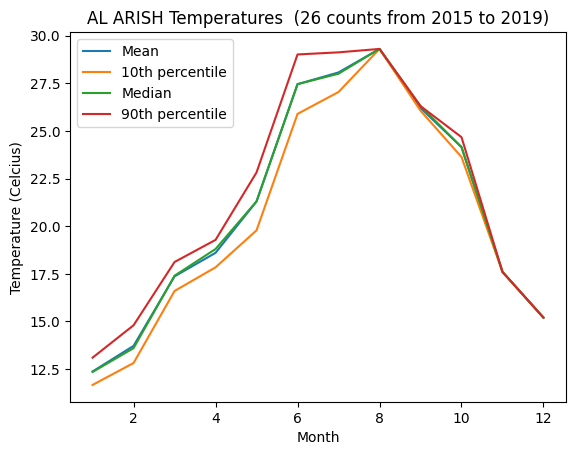

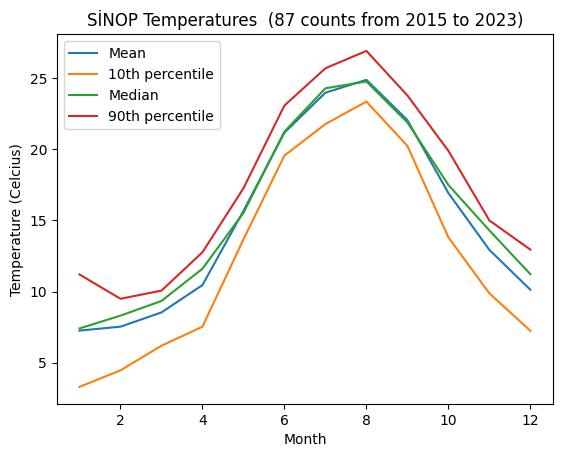

In [188]:
# Import pyplot from matplot library
import matplotlib.pyplot as plt

data_counts = data.groupby(["StationName","Temperature"])["Year"].count()
data_from = data.groupby(["StationName"])["Year"].min()
data_to = data.groupby(["StationName"])["Year"].max()

# Generate temperature plot charts for stations
for st in ("AL ARISH","SİNOP"):
    plt.figure()
    plt.xlabel('Month')
    # naming the y axis
    plt.ylabel('Temperature (Celcius)')
    title = st + " " + "Temperatures" + " " + " (" + str(data_counts[st].shape[0]) + " " + "counts from " \
    + str(data_from[st]) + " to " + str(data_to[st]) + ")"
    plt.title(title)
    plt.plot(temp_mean[st], label="Mean")
    plt.plot(temp_percentile_tenth[st], label="10th percentile")
    plt.plot(temp_median[st], label="Median")
    plt.plot(temp_percentile_ninetieth[st], label="90th percentile")
    plt.legend(loc="upper left")

# Print flow charts for each station
plt.show()


We close the plot library to free allocated memory. 

In [189]:
plt.close()

#### Precipitation

We then group the precipitation values for station names and months in the series `ppt_mean`. The statistical distribution of temperature values are represented by the first, second and third quantiles stored in the series `ppt_quantiles`.

In [190]:
# Store the temperature mean values
ppt_mean = data.groupby(["StationName","Month"])["Precipitation"].mean()

# Store the temperature quantile values
ppt_percentile_tenth = data.groupby(["StationName","Month"])["Precipitation"].quantile(0.10)
ppt_median = data.groupby(["StationName","Month"])["Precipitation"].quantile(0.50)
ppt_percentile_ninetieth = data.groupby(["StationName","Month"])["Precipitation"].quantile(0.90)

Check the temperature values by looking at the `head` and `tail` values.

In [191]:
ppt_mean.head()

StationName  Month
ADANA        1        153.011111
             2         72.175000
             3         86.833333
             4         51.077778
             5         39.044444
Name: Precipitation, dtype: float64

In [192]:
ppt_mean.tail()

StationName   Month
ŞIRNAK-CİZRE  11        27.20
              12        24.65
ŞİLE          6        223.10
ḤA'IL         3          2.00
              12         8.00
Name: Precipitation, dtype: float64

In [193]:
ppt_percentile_tenth.head()

StationName  Month
ADANA        1        47.26
             2        23.84
             3        44.40
             4        16.20
             5         2.28
Name: Precipitation, dtype: float64

In [194]:
ppt_median.head()

StationName  Month
ADANA        1        153.0
             2         87.8
             3         68.8
             4         44.6
             5         47.8
Name: Precipitation, dtype: float64

In [195]:
ppt_percentile_ninetieth.head()

StationName  Month
ADANA        1        260.60
             2        105.69
             3        129.90
             4         90.66
             5         72.52
Name: Precipitation, dtype: float64

### Precipitation plot
We will plot precipitation mean and quantiles for stations with respect to monthly average values. We import pyplot from matplotlib using `import matplotlib.pyplot as plt`. 

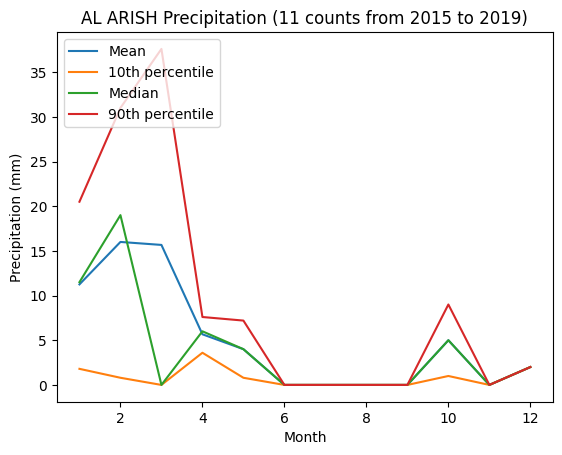

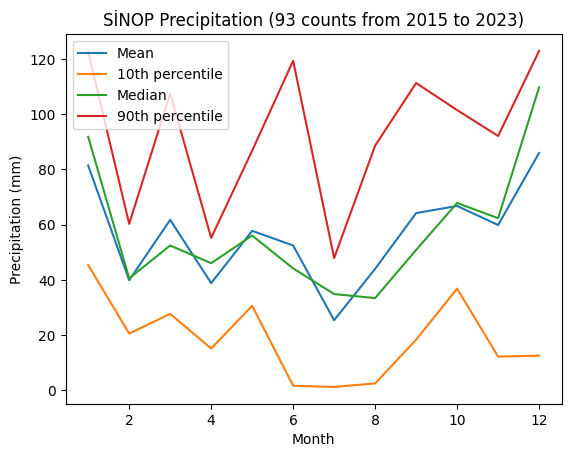

In [196]:
# Import pyplot from matplot library
import matplotlib.pyplot as plt

data_counts = data.groupby(["StationName","Precipitation"])["Year"].count()

# Generate temperature plot charts for stations
for st in ("AL ARISH","SİNOP"):
    plt.figure()
    plt.xlabel('Month')
    # naming the y axis
    plt.ylabel('Precipitation (mm)')
    title = st + " " + "Precipitation" + " (" + str(data_counts[st].shape[0]) + " " + "counts from " \
    + str(data_from[st]) + " to " + str(data_to[st]) + ")"
    plt.title(title)
    plt.plot(ppt_mean[st], label="Mean")
    plt.plot(ppt_percentile_tenth[st], label="10th percentile")
    plt.plot(ppt_median[st], label="Median")
    plt.plot(ppt_percentile_ninetieth[st], label="90th percentile")
    plt.legend(loc="upper left")

# Print flow charts for each station
plt.show()

In [197]:
data.to_excel('data_export.xlsx', index=False)

In [198]:
plt.close()

In [200]:
ppt_percentile_ninetieth["SİNOP"] - ppt_mean["SİNOP"]

Month
1     41.171111
2     20.415000
3     45.791111
4     16.382222
5     29.048889
6     66.940000
7     22.511429
8     44.630000
9     47.137143
10    34.735000
11    32.255000
12    36.950000
Name: Precipitation, dtype: float64